In [ ]:
from google.colab import drive
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Prostate Cancer (2).txt')
data=df
df.head()

Mounted at /content/drive


,id,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Best lambda for Ridge: 12.328467394420684, Test Error: 0.48726856160319965
Best lambda for Lasso: 0.1176811952434999, Test Error: 0.45240629823287265

Ridge Coefficients at Best Lambda:
Beta 1: 0.5138064660643383
Beta 2: 0.2712638112909057
Beta 3: -0.07733144566140647
Beta 4: 0.1862479276750897
Beta 5: 0.2586393350135934
Beta 6: -0.06501781083945873
Beta 7: 0.031057236731019396
Beta 8: 0.16114042622952338

Lasso Coefficients at Best Lambda:
Beta 1: 0.5685730313586164
Beta 2: 0.22188539696053983
Beta 3: -0.0
Beta 4: 0.08836021333692591
Beta 5: 0.1585946811555263
Beta 6: 0.0
Beta 7: 0.0
Beta 8: 0.05459958797004965

Ridge Weights and MSE:
      Beta 1    Beta 2    Beta 3    Beta 4    Beta 5    Beta 6    Beta 7  \
0   0.711038  0.290450 -0.141481  0.210419  0.307300 -0.286837 -0.020756   
1   0.711037  0.290450 -0.141481  0.210419  0.307300 -0.286837 -0.020756   

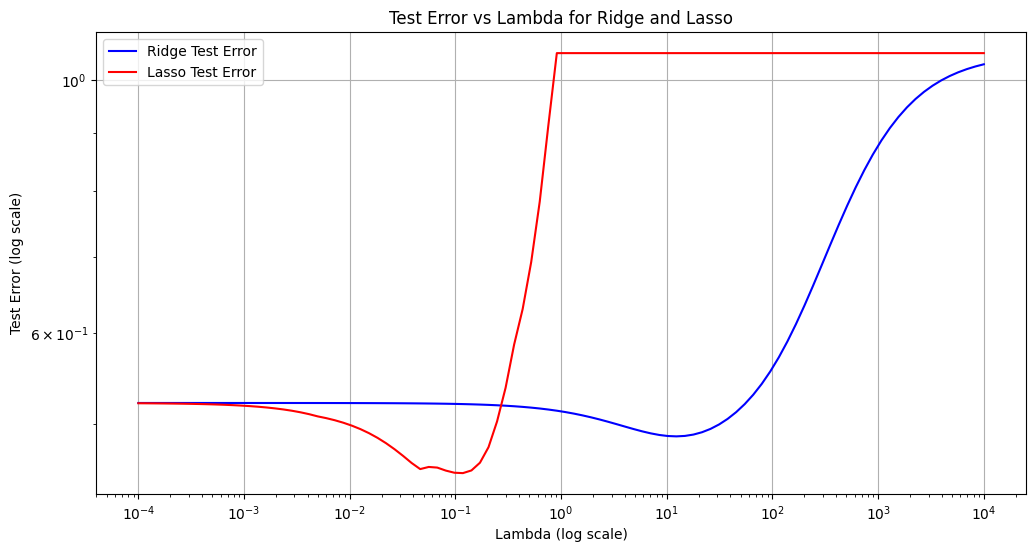

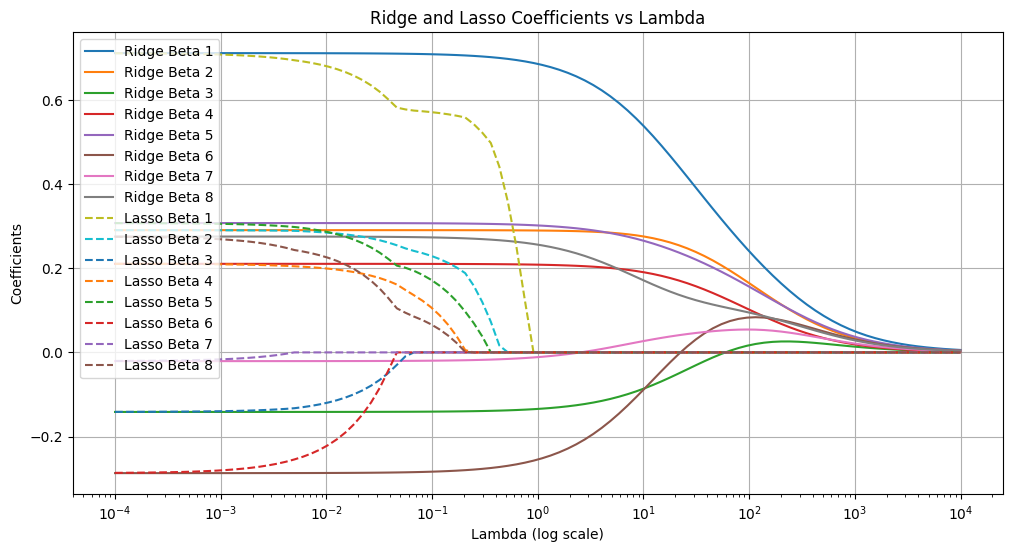

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from google.colab import drive

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Prostate Cancer (2).txt')

df.iloc[:, 1:-2] = df.iloc[:, 1:-2].apply(pd.to_numeric)
df['train'] = df['train'].apply(lambda x: x == 'T')

train_df = df[df['train'] == True]
test_df = df[df['train'] == False]

X_train = train_df[['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']].values
y_train = train_df['lpsa'].values.astype(float)
X_test = test_df[['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']].values
y_test = test_df['lpsa'].values.astype(float)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lambdas = np.logspace(-4, 4, 100)

ridge_errors = []
lasso_errors = []
ridge_betas = []
lasso_betas = []

for l in lambdas:
    ridge_model = Ridge(alpha=l)
    ridge_model.fit(X_train_scaled, y_train)
    y_pred_ridge = ridge_model.predict(X_test_scaled)
    ridge_errors.append(mean_squared_error(y_test, y_pred_ridge))
    ridge_betas.append(ridge_model.coef_)

    lasso_model = Lasso(alpha=l, max_iter=10000)
    lasso_model.fit(X_train_scaled, y_train)
    y_pred_lasso = lasso_model.predict(X_test_scaled)
    lasso_errors.append(mean_squared_error(y_test, y_pred_lasso))
    lasso_betas.append(lasso_model.coef_)

best_lambda_ridge = lambdas[np.argmin(ridge_errors)]
best_lambda_lasso = lambdas[np.argmin(lasso_errors)]

best_ridge_model = Ridge(alpha=best_lambda_ridge)
best_ridge_model.fit(X_train_scaled, y_train)
best_ridge_betas = best_ridge_model.coef_

best_lasso_model = Lasso(alpha=best_lambda_lasso, max_iter=10000)
best_lasso_model.fit(X_train_scaled, y_train)
best_lasso_betas = best_lasso_model.coef_

print(f"Best lambda for Ridge: {best_lambda_ridge}, Test Error: {min(ridge_errors)}")
print(f"Best lambda for Lasso: {best_lambda_lasso}, Test Error: {min(lasso_errors)}")

print("\nRidge Coefficients at Best Lambda:")
for i, beta in enumerate(best_ridge_betas):
    print(f"Beta {i+1}: {beta}")

print("\nLasso Coefficients at Best Lambda:")
for i, beta in enumerate(best_lasso_betas):
    print(f"Beta {i+1}: {beta}")

ridge_betas_df = pd.DataFrame(ridge_betas, columns=[f'Beta {i+1}' for i in range(ridge_betas[0].shape[0])])
ridge_betas_df['Lambda'] = lambdas
ridge_betas_df['MSE'] = ridge_errors

lasso_betas_df = pd.DataFrame(lasso_betas, columns=[f'Beta {i+1}' for i in range(lasso_betas[0].shape[0])])
lasso_betas_df['Lambda'] = lambdas
lasso_betas_df['MSE'] = lasso_errors

print("\nRidge Weights and MSE:")
print(ridge_betas_df)

print("\nLasso Weights and MSE:")
print(lasso_betas_df)

plt.figure(figsize=(12, 6))
plt.plot(lambdas, ridge_errors, label="Ridge Test Error", color="blue")
plt.plot(lambdas, lasso_errors, label="Lasso Test Error", color="red")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Lambda (log scale)")
plt.ylabel("Test Error (log scale)")
plt.title("Test Error vs Lambda for Ridge and Lasso")
plt.legend()
plt.grid(True)
plt.show()

ridge_betas = np.array(ridge_betas)
lasso_betas = np.array(lasso_betas)

plt.figure(figsize=(12, 6))
for i in range(ridge_betas.shape[1]):
    plt.plot(lambdas, ridge_betas[:, i], label=f'Ridge Beta {i+1}')
for i in range(lasso_betas.shape[1]):
    plt.plot(lambdas, lasso_betas[:, i], label=f'Lasso Beta {i+1}', linestyle='dashed')

plt.xscale("log")
plt.xlabel("Lambda (log scale)")
plt.ylabel("Coefficients")
plt.title("Ridge and Lasso Coefficients vs Lambda")
plt.legend()
plt.grid(True)
plt.show()
